In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file = r"C:\Users\danie\Documents\full.csv"

titanic = pd.read_csv(file)
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,C,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0


# Data Cleaning Begins

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [6]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [7]:
# Filling NaN with 2.0 to indicate unknown
titanic['Survived'] = titanic['Survived'].fillna(2)

In [8]:
titanic['Survived'].tail()

1304    2.0
1305    2.0
1306    2.0
1307    2.0
1308    2.0
Name: Survived, dtype: float64

# Filled in and dropped columns as needed for clean dataset

In [10]:
# Fill Age NANs with average column age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

# Fill Fare NANs with median cost of all recorded passengers
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

# Drop Cabin, Lifeboat, and Body as they are not important
titanic = titanic.drop(['Cabin', 'Lifeboat', 'Body'], axis=1)

# Fill Class NANs with average popular class
titanic['Class'] = titanic['Class'].fillna(titanic['Class'].mean())

# Fill WikiId with 999.999 for unknown
titanic['WikiId'] = titanic['WikiId'].fillna(999.999)

# Fill NANs with average age of column
titanic['Age_wiki'] = titanic['Age_wiki'].fillna(titanic['Age_wiki'].mean())

# Fill Name_wiki NANs with Unknown
titanic['Name_wiki'] = titanic['Name_wiki'].fillna('Unknown')


In [11]:
titanic['Embarked'].value_counts()


S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
# With S being most popular Embarked fill in NANs with S
titanic['Embarked'] = titanic['Embarked'].fillna('S')

# S = Southampton, C = Cherbourg, Q = Queenstown, B = Belfast

In [14]:
titanic['Boarded'].value_counts()

Southampton    916
Cherbourg      259
Queenstown     119
Belfast         10
Name: Boarded, dtype: int64

In [15]:
# With Southampton being most popular Boarded fill in NANs with Southhampton
titanic['Boarded'] = titanic['Boarded'].fillna('Southampton')

In [16]:
titanic['Hometown'].value_counts()

New York, New York, US                70
London, England                       49
London, England, UK                   30
Paris, France                         23
Montreal, Quebec, Canada              20
                                      ..
Avaldsnes, Stavanger, Norway           1
Marbella, Spain                        1
Västermo, Södermanland, Sweden         1
Trollhättan, Västergötland, Sweden     1
Sar'al[81], Syria                      1
Name: Hometown, Length: 566, dtype: int64

In [17]:
# With New York, US being most popular Hometown fill in NANs with New York, US
titanic['Hometown'] = titanic['Hometown'].fillna('New York, US')

In [18]:
titanic['Destination'].value_counts()

New York City                          234
New York, New York, US                 127
Chicago, Illinois, US                   75
Montreal, Quebec, Canada                37
Detroit, Michigan, US                   28
                                      ... 
East Bridgewater, Massachusetts, US      1
Oregon, Wisconsin, US                    1
Rahway, New Jersey, US                   1
Stoughton, Massachusetts                 1
US                                       1
Name: Destination, Length: 291, dtype: int64

In [19]:
# With New York City being most popular Destination fill in NANs with New York City
titanic['Destination'] = titanic['Destination'].fillna('New York City')

# Null values have been cleaned

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  WikiId       1309 non-null   float64
 12  Name_wiki    1309 non-null   object 
 13  Age_wiki     1309 non-null   float64
 14  Hometown     1309 non-null   object 
 15  Boarded      1309 non-null   object 
 16  Destination  1309 non-null   object 
 17  Class        1309 non-null   float64
dtypes: float64(6), int64(4), object(8)
memory usage:

In [22]:
# Fill Class NANs with most popular class
titanic['Class'] = titanic['Class'].fillna(titanic['Class'].mean())

In [23]:
# Data fully cleaned
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  WikiId       1309 non-null   float64
 12  Name_wiki    1309 non-null   object 
 13  Age_wiki     1309 non-null   float64
 14  Hometown     1309 non-null   object 
 15  Boarded      1309 non-null   object 
 16  Destination  1309 non-null   object 
 17  Class        1309 non-null   float64
dtypes: float64(6), int64(4), object(8)
memory usage:

# Data exploration begins!!!

In [25]:
# What is the total number of passengers in the dataset? How many survived and how many didn't?
num = len(titanic['PassengerId'])
print (f"There were {num} passengers on the ship")

num_survivors = (titanic["Survived"] == 1.0).sum()
print("Survivors:", num_survivors)

deceased = (titanic["Survived"] == 0).sum()
print("Deceased:", deceased)

unk = (titanic["Survived"] == 2).sum()
print("Unknown:", unk)


There were 1309 passengers on the ship
Survivors: 342
Deceased: 549
Unknown: 418


In [26]:
titanic["Survived"].value_counts()

0.0    549
2.0    418
1.0    342
Name: Survived, dtype: int64

In [27]:
# What is the count of male and female passengers?
titanic['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [28]:
# How many passengers are there in each Pclass (1st, 2nd, 3rd)?
titanic['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

# Above we can see The Titanic had mostly 3rd class citizens aboard. 

# S = Southampton, C = Cherbourg, Q= Queenstown

In [31]:
# What are the counts for each embarkation point (Embarked)?
titanic['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [32]:
# What is the minimum, maximum, and average fare paid by passengers?
mn = titanic['Fare'].min()
print(f'The mininmum fare was {mn}')

mx = titanic['Fare'].max()
rmx = round(mx, 2)
print(f'The maximum fare was {rmx}')

av = titanic['Fare'].mean()
rav = round(av, 2)
print(f'The average fare was {rav}')

The mininmum fare was 0.0
The maximum fare was 512.33
The average fare was 33.28


In [33]:
# How many missing values are there for each column?
missing_values = titanic.isnull().sum()
print(missing_values)
# All 0's as data was cleaned

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
WikiId         0
Name_wiki      0
Age_wiki       0
Hometown       0
Boarded        0
Destination    0
Class          0
dtype: int64


## Intermediate Questions

In [35]:
# What percentage of male and female passengers survived?
# Filter the dataset to include only known survival outcomes 
titanic1 = titanic[titanic['Survived'] != 2]

# Calculate the percentage of survivors for each gender
survival_percentage = titanic1[titanic1['Survived'] == 1].groupby('Sex').size() / titanic1.groupby('Sex').size() * 100

# Display the result
print(survival_percentage)

Sex
female    74.203822
male      18.890815
dtype: float64


In [36]:
# What percentage of passengers survived in each Pclass?
# Exclude rows where survival status is unknown (Survived = 2)
titanic2 = titanic[titanic['Survived'] != 2]

# Calculate the percentage of survivors in each Pclass
survival_by_pclass = titanic2[titanic2['Survived'] == 1].groupby('Pclass').size() / titanic2.groupby('Pclass').size() * 100

# Display the result
print(survival_by_pclass)

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64


In [37]:
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [38]:
# Create age bins (e.g., child, young adult, adult, senior) and calculate survival rates for each group.

# Exclude rows with missing survival data (Survived = 2) or missing Age
titanic2 = titanic[(titanic['Survived'] != 2) & (titanic['Age'].notnull())]

# Define age bins and labels
age_bins = [0, 12, 18, 35, 60, 100]  # Define age ranges
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']  # Labels for each bin

# Create a new column for age group
titanic2['AgeGroup'] = pd.cut(titanic2['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival rates for each age group
survival_by_age_group = titanic2[titanic2['Survived'] == 1].groupby('AgeGroup').size() / titanic2.groupby('AgeGroup').size() * 100

# Display the result
print(survival_by_age_group)

AgeGroup
Child          57.352941
Teenager       48.888889
Young Adult    34.438306
Adult          41.626794
Senior         26.923077
dtype: float64


## Above is percentage of survivors by age group. Just over half the children survived while most senior citizens perished :(

In [40]:
# Is there a correlation between fare amount and survival probability?
titanic['Fare'].corr(titanic['Survived'])
# Number is  very close to 0 so no real correlation

0.12264149742231904

## There is no real correlation between fare amount and survivability. If there was the number would be 1 or closer to it.

In [42]:
# Does the embarkation point (Embarked) correlate with survival rates?
# Filter rows with known survival status (Survived = 0 or 1) and non-null Embarked values
titanic2 = titanic[(titanic['Survived'] != 2) & (titanic['Embarked'].notnull())]

# Calculate survival rates for each embarkation point
titanic2[titanic2['Survived'] == 1].groupby('Embarked').size() / titanic2.groupby('Embarked').size() * 100


Embarked
C    55.357143
Q    38.961039
S    33.900929
dtype: float64

### Those who embarked from Cherbourg had the greatest survival rate with over a 50% chance. Those from Queenstown had almost a 40% chance of survival. Southampton and Belfast bring up the rear with a 30% chance of survial if you were from Southampton and unfortunately there were no survivors from Belfast.

In [44]:
# What is the average age of survivors versus non-survivors?

# Filter rows for survivors (Survived = 1) and non-null Age values
survivors = titanic[(titanic['Survived'] == 1) & (titanic['Age'].notnull())]

# Calculate the average age of survivors
average_age_survivors = survivors['Age'].mean()

# Display the result
print(f"The average age of survivors is: {average_age_survivors:.0f} years")

The average age of survivors is: 29 years


In [45]:
# What are the number of people per age group
# Define age bins and labels
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create a new column for age group
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of people in each age group
age_group_counts = titanic['AgeGroup'].value_counts()

# Display the result
print(age_group_counts)

Young Adult    810
Adult          305
Child           91
Teenager        63
Senior          40
Name: AgeGroup, dtype: int64


## Young Adults made up the largest group of individuals on the ship. Their age ranging from 18-34.

# Hard Questions

In [48]:
# Are there any anomalies where passengers in lower classes paid higher fares than those in higher classes?

# Calculate statistics for each Pclass
fare_stats = titanic.groupby('Pclass')['Fare'].agg(['mean', 'max', 'median', 'min']).reset_index()
print(f"Fare statistics by Pclass:\n{fare_stats}\n")

# Find anomalies where a lower-class passenger paid more than the max fare in a higher class
anomalies = []

# Loop through Pclass levels and compare fares
for lower_class in [2, 3]:  # Only check for lower classes
    for higher_class in range(1, lower_class):  # Compare against higher classes
        higher_class_avg_fare = titanic[titanic['Pclass'] == higher_class]['Fare'].mean()
        
        # Identify passengers in lower_class who paid more than higher_class_max_fare
        anomaly = titanic[(titanic['Pclass'] == lower_class) & (titanic['Fare'] > higher_class_avg_fare)]
        anomalies.append(anomaly)

# Combine all anomalies into one DataFrame
anomalies_df = pd.concat(anomalies, ignore_index=True)

# Display anomalies
print("Anomalies where lower-class passengers paid higher fares than higher-class passengers:")
anomalies_df[['PassengerId', 'Pclass', 'Fare']]

Fare statistics by Pclass:
   Pclass       mean       max   median  min
0       1  87.508992  512.3292  60.0000  0.0
1       2  21.179196   73.5000  15.0458  0.0
2       3  13.304513   69.5500   8.0500  0.0

Anomalies where lower-class passengers paid higher fares than higher-class passengers:


,PassengerId,Pclass,Fare
0,14,3,31.2750
1,17,3,29.1250
2,26,3,31.3875
3,49,3,21.6792
4,51,3,39.6875
...,...,...,...
93,1257,3,69.5500
94,1259,3,39.6875
95,1271,3,31.3875
96,1286,3,22.0250


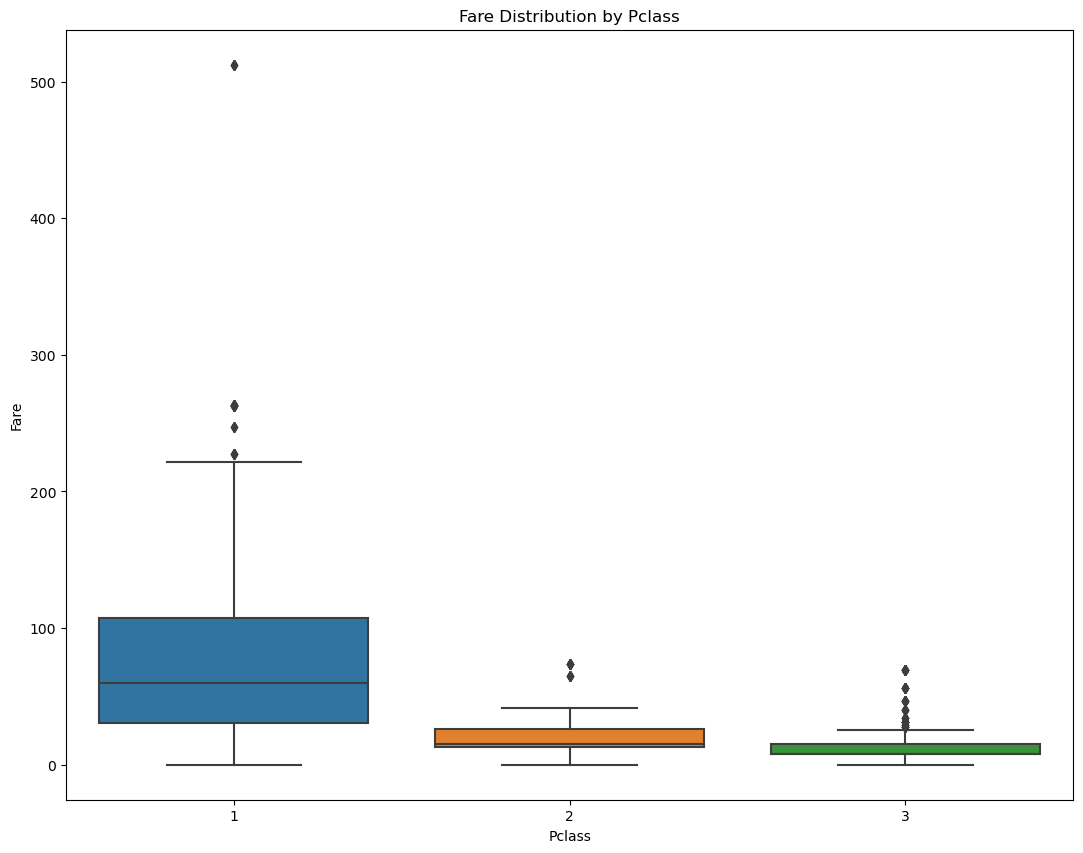

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Fare Distribution by Pclass')
plt.show()

## Above shows outliers with regards to purchasing tickets for the ship. Most of the outliers were 3rd class individuals.

## Below here is general information about the different titles and genders of individuals on the ship.

In [52]:
# Analyze the Name column to find patterns in naming conventions for passengers of different classes or genders.
# Extract titles from the Name column
import re

titanic['Title'] = titanic['Name'].apply(lambda x: re.findall(' ([A-Za-z]+)\.', x)[0])

# Check the distribution of titles
title_counts = titanic['Title'].value_counts()
print(title_counts)

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64


In [53]:
# Analyze the relationship between Title and Gender
title_gender_counts = titanic.groupby(['Title', 'Sex']).size().unstack()
print(title_gender_counts)

Sex       female   male
Title                  
Capt         NaN    1.0
Col          NaN    4.0
Countess     1.0    NaN
Don          NaN    1.0
Dona         1.0    NaN
Dr           1.0    7.0
Jonkheer     NaN    1.0
Lady         1.0    NaN
Major        NaN    2.0
Master       NaN   61.0
Miss       260.0    NaN
Mlle         2.0    NaN
Mme          1.0    NaN
Mr           NaN  757.0
Mrs        197.0    NaN
Ms           2.0    NaN
Rev          NaN    8.0
Sir          NaN    1.0


In [54]:
# Analyze the relationship between Title and Pclass (Passenger Class)
title_class_counts = titanic.groupby(['Title', 'Pclass']).size().unstack()
print(title_class_counts)

Pclass        1      2      3
Title                        
Capt        1.0    NaN    NaN
Col         4.0    NaN    NaN
Countess    1.0    NaN    NaN
Don         1.0    NaN    NaN
Dona        1.0    NaN    NaN
Dr          6.0    2.0    NaN
Jonkheer    1.0    NaN    NaN
Lady        1.0    NaN    NaN
Major       2.0    NaN    NaN
Master      5.0   11.0   45.0
Miss       60.0   50.0  150.0
Mlle        2.0    NaN    NaN
Mme         1.0    NaN    NaN
Mr        159.0  150.0  448.0
Mrs        77.0   55.0   65.0
Ms          NaN    1.0    1.0
Rev         NaN    8.0    NaN
Sir         1.0    NaN    NaN


In [55]:
# Analyze how Title correlates with Age
title_age_analysis = titanic.groupby('Title')['Age'].describe()
print(title_age_analysis)

          count       mean        std    min        25%        50%        75%  \
Title                                                                           
Capt        1.0  70.000000        NaN  70.00  70.000000  70.000000  70.000000   
Col         4.0  54.000000   5.477226  47.00  51.500000  54.500000  57.000000   
Countess    1.0  33.000000        NaN  33.00  33.000000  33.000000  33.000000   
Don         1.0  40.000000        NaN  40.00  40.000000  40.000000  40.000000   
Dona        1.0  39.000000        NaN  39.00  39.000000  39.000000  39.000000   
Dr          8.0  41.860142  11.890635  23.00  31.470284  46.500000  50.750000   
Jonkheer    1.0  38.000000        NaN  38.00  38.000000  38.000000  38.000000   
Lady        1.0  48.000000        NaN  48.00  48.000000  48.000000  48.000000   
Major       2.0  48.500000   4.949747  45.00  46.750000  48.500000  50.250000   
Master     61.0   8.682444   9.163600   0.33   2.000000   6.000000  11.000000   
Miss      260.0  23.333257  

In [56]:
# Analyze the relationship between Title, Pclass, Sex, and Age
title_class_gender_age = titanic.groupby(['Title', 'Pclass', 'Sex'])['Age'].mean()
print(title_class_gender_age)

Title     Pclass  Sex   
Capt      1       male      70.000000
Col       1       male      54.000000
Countess  1       female    33.000000
Don       1       male      40.000000
Dona      1       female    39.000000
Dr        1       female    49.000000
                  male      41.776228
          2       male      38.500000
Jonkheer  1       male      38.000000
Lady      1       female    48.000000
Major     1       male      48.500000
Master    1       male       6.984000
          2       male       2.757273
          3       male      10.319536
Miss      1       female    30.331352
          2       female    21.083646
          3       female    21.283890
Mlle      1       female    24.000000
Mme       1       female    24.000000
Mr        1       male      39.486105
          2       male      32.133032
          3       male      28.793158
Mrs       1       female    41.478070
          2       female    33.452384
          3       female    31.724588
Ms        2       female 

In [57]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Class', 'AgeGroup',
       'Title'],
      dtype='object')